# 📊 ĐÁP ÁN: Bài tập thực hành Trực quan hóa dữ liệu

## 🎯 Mục tiêu bài tập

Sau khi hoàn thành các bài tập này, bạn sẽ có thể:

✅ **Tạo các biểu đồ cơ bản với matplotlib** (line plot, bar chart, histogram)  
✅ **Sử dụng seaborn** để tạo các biểu đồ thống kê nâng cao  
✅ **Áp dụng pandas plotting** để trực quan hóa dữ liệu nhanh chóng  
✅ **Chọn loại biểu đồ phù hợp** cho từng tình huống phân tích  
✅ **Áp dụng các nguyên tắc thiết kế tốt** để tạo biểu đồ rõ ràng và hiệu quả  
✅ **Nhận biết và sửa các lỗi thiết kế** trong trực quan hóa dữ liệu  

---

## 📋 Cấu trúc đáp án

**Phần 1: Matplotlib cơ bản**
- Bài 1.1: Biểu đồ đường (Line plot) - Doanh thu theo thời gian
- Bài 1.2: Biểu đồ cột (Bar chart) - Doanh số theo danh mục sản phẩm

**Phần 2: Trực quan hóa thống kê**
- Bài 2.1: Histogram và Density plot - Phân bố lương nhân viên
- Bài 2.2: Boxplot - So sánh doanh số theo khu vực

**Phần 3: Seaborn nâng cao**
- Bài 3.1: Seaborn histogram với KDE
- Bài 3.2: Scatter plot với đường hồi quy

**Phần 4: Pandas Plotting**
- Bài 4.1: Trực quan hóa nhanh với pandas

**Phần 5: Seaborn nâng cao (tiếp theo)**
- Bài 5.1: Heatmap (Bản đồ nhiệt)
- Bài 5.2: Violin Plot
- Bài 5.3: Pair Plot (Biểu đồ cặp)

**Phần 6: Trực quan hóa nâng cao**
- Bài 6.1: Subplots với nhiều biểu đồ
- Bài 6.2: Biểu đồ theo nhóm (Grouped Visualization)
- Bài 6.3: Time Series Visualization
- Bài 6.4: Customization và Styling nâng cao

---

## ⚠️ Lưu ý

> **📝 Đây là đáp án mẫu:** Có thể có nhiều cách giải khác nhau. Hãy thử nghiệm và tùy chỉnh code theo ý bạn!

> **💡 Giải thích:** Mỗi bài tập đều có comment giải thích cách tiếp cận và lý do sử dụng các phương pháp cụ thể.


## 🛠️ Thiết lập môi trường


In [1]:
# Cài đặt thư viện cho Google Colab (bỏ qua nếu đã cài đặt)
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    from scipy.stats import pearsonr
    print("✅ Tất cả thư viện đã sẵn sàng!")
    print("🚀 Bạn có thể bắt đầu xem đáp án!")
except ImportError as e:
    print(f"❌ Thiếu thư viện: {e}")
    print("🔧 Đang cài đặt...")
    import subprocess
    import sys
    
    # Cài đặt các thư viện cần thiết
    packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy']
    for package in packages:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    
    print("✅ Cài đặt hoàn tất! Vui lòng restart kernel và chạy lại cell này.")

# Thiết lập matplotlib để hiển thị trong notebook
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

# Thiết lập style cho seaborn
sns.set_theme(style="whitegrid", palette="deep")
plt.style.use('seaborn-v0_8')


✅ Tất cả thư viện đã sẵn sàng!
🚀 Bạn có thể bắt đầu xem đáp án!


## 📊 Tạo dữ liệu ban đầu

Chạy cell này để tạo tất cả dữ liệu mẫu cho các bài tập.


In [2]:
# 📊 TẠO DỮ LIỆU BAN ĐẦU
# Chạy cell này để tạo tất cả dữ liệu mẫu cho các bài tập

import pandas as pd
import numpy as np

# Thiết lập seed để kết quả có thể tái tạo
np.random.seed(42)

print("📊 Đang tạo dữ liệu mẫu...")

# 1. Dữ liệu doanh thu theo tháng (cho Bài 1.1)
months = np.arange(1, 13)
base_revenue = 100
trend = np.linspace(0, 50, 12)
noise = np.random.normal(0, 10, 12)
revenue_data = base_revenue + trend + noise
revenue_data = np.maximum(revenue_data, 80)

print("✅ Dữ liệu doanh thu theo tháng đã tạo")

# 2. Dữ liệu doanh số theo danh mục (cho Bài 1.2)
categories = ['Điện tử', 'Thời trang', 'Thực phẩm', 'Sách', 'Thể thao']
sales_data = np.array([150, 120, 200, 80, 100])

print("✅ Dữ liệu doanh số theo danh mục đã tạo")

# 3. Dữ liệu lương nhân viên (cho Bài 2.1)
salary_data = np.random.normal(loc=15, scale=5, size=100)
salary_data = np.clip(salary_data, 5, 30)

print("✅ Dữ liệu lương nhân viên đã tạo")

# 4. Dữ liệu doanh số theo khu vực (cho Bài 2.2)
bac = np.random.normal(loc=150, scale=20, size=50)
trung = np.random.normal(loc=120, scale=15, size=50)
nam = np.random.normal(loc=180, scale=25, size=50)
tay_nguyen = np.random.normal(loc=100, scale=18, size=50)
region_data = {
    'Bắc': bac,
    'Trung': trung,
    'Nam': nam,
    'Tây Nguyên': tay_nguyen
}

print("✅ Dữ liệu doanh số theo khu vực đã tạo")

# 5. Dữ liệu điểm số học sinh (cho Bài 3.1)
scores_data = np.random.normal(loc=7, scale=1.5, size=200)
scores_data = np.clip(scores_data, 0, 10)
df_scores = pd.DataFrame({'Diem': scores_data})

print("✅ Dữ liệu điểm số học sinh đã tạo")

# 6. Dữ liệu học tập (cho Bài 3.2)
study_hours_data = np.random.uniform(10, 40, 100)
scores_study = 5 + 0.15 * study_hours_data + np.random.normal(0, 1, 100)
scores_study = np.clip(scores_study, 0, 10)
df_study = pd.DataFrame({
    'GioHoc': study_hours_data,
    'Diem': scores_study
})

print("✅ Dữ liệu học tập đã tạo")

# 7. Dữ liệu doanh thu theo tháng và sản phẩm (cho Bài 4.1)
months_dates = pd.date_range('2024-01-01', periods=12, freq='M')
revenue_products = {
    'SanPham_A': np.random.randint(100, 200, 12).cumsum(),
    'SanPham_B': np.random.randint(80, 180, 12).cumsum(),
    'SanPham_C': np.random.randint(120, 220, 12).cumsum()
}
df_revenue = pd.DataFrame(revenue_products, index=months_dates)

print("✅ Dữ liệu doanh thu theo sản phẩm đã tạo")

# 8. Dữ liệu bổ sung cho các bài tập mới
# Dữ liệu bán hàng theo tháng và nhân viên
sales_employees = pd.DataFrame({
    'Thang': pd.date_range('2024-01-01', periods=6, freq='M'),
    'NV_A': np.random.randint(50, 100, 6),
    'NV_B': np.random.randint(60, 110, 6),
    'NV_C': np.random.randint(45, 95, 6),
    'NV_D': np.random.randint(55, 105, 6)
})

# Dữ liệu khách hàng với nhiều thuộc tính
customer_data = pd.DataFrame({
    'Tuoi': np.random.randint(18, 65, 150),
    'ThuNhap': np.random.randint(10, 50, 150) * 1000000,
    'ChiTieu': np.random.randint(5, 30, 150) * 1000000,
    'GioiTinh': np.random.choice(['Nam', 'Nữ'], 150),
    'ThanhPho': np.random.choice(['Hà Nội', 'TP.HCM', 'Đà Nẵng', 'Cần Thơ'], 150)
})

print("✅ Dữ liệu bổ sung đã tạo")

print("\n🎉 Tất cả dữ liệu đã sẵn sàng!")


📊 Đang tạo dữ liệu mẫu...
✅ Dữ liệu doanh thu theo tháng đã tạo
✅ Dữ liệu doanh số theo danh mục đã tạo
✅ Dữ liệu lương nhân viên đã tạo
✅ Dữ liệu doanh số theo khu vực đã tạo
✅ Dữ liệu điểm số học sinh đã tạo
✅ Dữ liệu học tập đã tạo
✅ Dữ liệu doanh thu theo sản phẩm đã tạo
✅ Dữ liệu bổ sung đã tạo

🎉 Tất cả dữ liệu đã sẵn sàng!


/var/folders/8x/cphm0p8j0h16x_zm6w8f2nww0000gn/T/ipykernel_8122/1517638990.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months_dates = pd.date_range('2024-01-01', periods=12, freq='M')
/var/folders/8x/cphm0p8j0h16x_zm6w8f2nww0000gn/T/ipykernel_8122/1517638990.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Thang': pd.date_range('2024-01-01', periods=6, freq='M'),


# 📈 Phần 1: Matplotlib cơ bản

## Bài 1.1 - Biểu đồ đường (Line Plot) - ĐÁP ÁN


📊 Sử dụng dữ liệu doanh thu đã tạo...
Dữ liệu: 12 tháng, doanh thu từ 103 đến 146 triệu VND

📈 Vẽ biểu đồ đường...


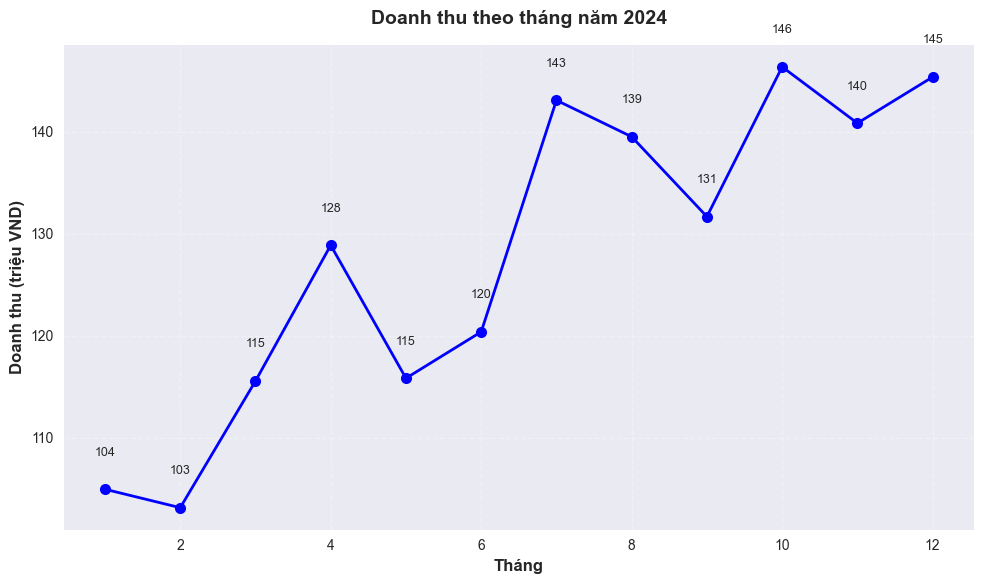


✅ Hoàn thành!


In [3]:
# 📊 ĐÁP ÁN BÀI TẬP 1.1: Biểu đồ đường (Line Plot)
# Sử dụng dữ liệu đã tạo sẵn (months, revenue_data) từ cell "Tạo dữ liệu ban đầu"

import matplotlib.pyplot as plt
import numpy as np

# 1. Sử dụng dữ liệu đã tạo sẵn
print("📊 Sử dụng dữ liệu doanh thu đã tạo...")
print(f"Dữ liệu: {len(months)} tháng, doanh thu từ {revenue_data.min():.0f} đến {revenue_data.max():.0f} triệu VND")

# 2. Vẽ biểu đồ đường
print("\n📈 Vẽ biểu đồ đường...")

# Sử dụng plt.plot() để vẽ biểu đồ với months và revenue_data
plt.figure(figsize=(10, 6))
plt.plot(months, revenue_data, color='blue', marker='o', linewidth=2, markersize=8)

# Thêm tiêu đề
plt.title('Doanh thu theo tháng năm 2024', fontsize=14, fontweight='bold', pad=15)

# Thêm nhãn cho trục x và y
plt.xlabel('Tháng', fontsize=12, fontweight='bold')
plt.ylabel('Doanh thu (triệu VND)', fontsize=12, fontweight='bold')

# Hiển thị lưới (grid)
plt.grid(True, alpha=0.3, linestyle='--')

# Thêm nhãn giá trị trên các điểm
for i, (m, r) in enumerate(zip(months, revenue_data)):
    plt.text(m, r + 3, f'{int(r)}', ha='center', va='bottom', fontsize=9)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

print("\n✅ Hoàn thành!")


## Bài 1.2 - Biểu đồ cột (Bar Chart) - ĐÁP ÁN


📊 Tạo dữ liệu doanh số...
Doanh số theo danh mục: {'Điện tử': np.int64(150), 'Thời trang': np.int64(120), 'Thực phẩm': np.int64(200), 'Sách': np.int64(80), 'Thể thao': np.int64(100)}

📊 Vẽ biểu đồ cột...


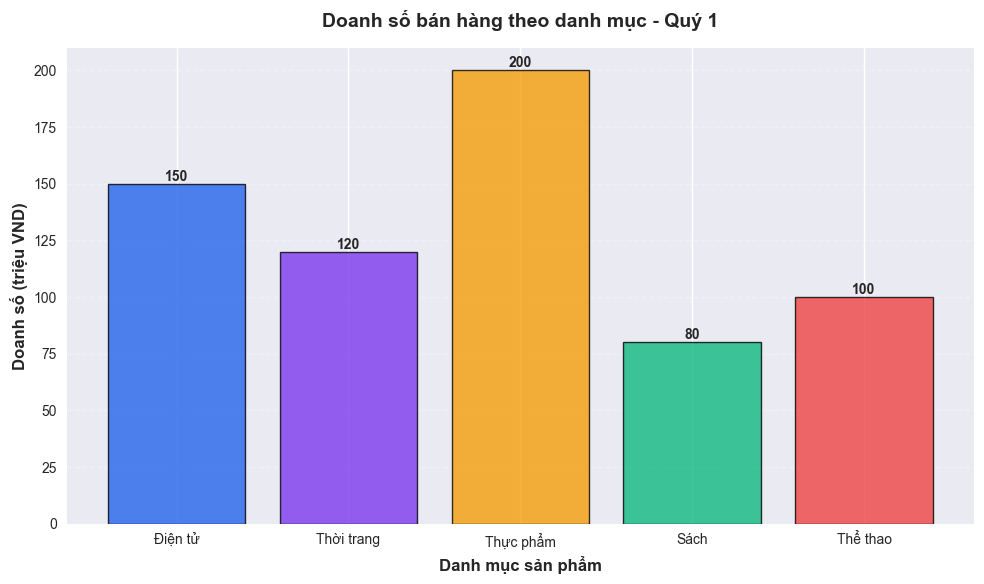


✅ Hoàn thành!


In [4]:
# 📊 ĐÁP ÁN BÀI TẬP 1.2: Biểu đồ cột (Bar Chart)

import matplotlib.pyplot as plt
import numpy as np

# 1. Tạo dữ liệu về doanh số theo danh mục
print("📊 Tạo dữ liệu doanh số...")

# Tạo danh sách tên danh mục
categories = ['Điện tử', 'Thời trang', 'Thực phẩm', 'Sách', 'Thể thao']

# Tạo dữ liệu doanh số (triệu VND) cho mỗi danh mục
sales = np.array([150, 120, 200, 80, 100])

print(f"Doanh số theo danh mục: {dict(zip(categories, sales))}")

# 2. Vẽ biểu đồ cột
print("\n📊 Vẽ biểu đồ cột...")

# Tạo figure và axes với kích thước phù hợp
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột với màu sắc khác nhau
colors = ['#2563eb', '#7c3aed', '#f59e0b', '#10b981', '#ef4444']
bars = ax.bar(categories, sales, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Thêm tiêu đề và nhãn
ax.set_title('Doanh số bán hàng theo danh mục - Quý 1', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Danh mục sản phẩm', fontsize=12, fontweight='bold')
ax.set_ylabel('Doanh số (triệu VND)', fontsize=12, fontweight='bold')

# Thêm nhãn giá trị trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Xoay nhãn trục x nếu cần
plt.xticks(rotation=0, ha='center')

# Thêm grid
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

print("\n✅ Hoàn thành!")


# 📊 Phần 2: Trực quan hóa thống kê

## Bài 2.1 - Histogram và Density Plot - ĐÁP ÁN


💰 Tạo dữ liệu lương nhân viên...
Số lượng nhân viên: 100
Lương trung bình: 14.51 triệu VND

📊 Vẽ histogram...


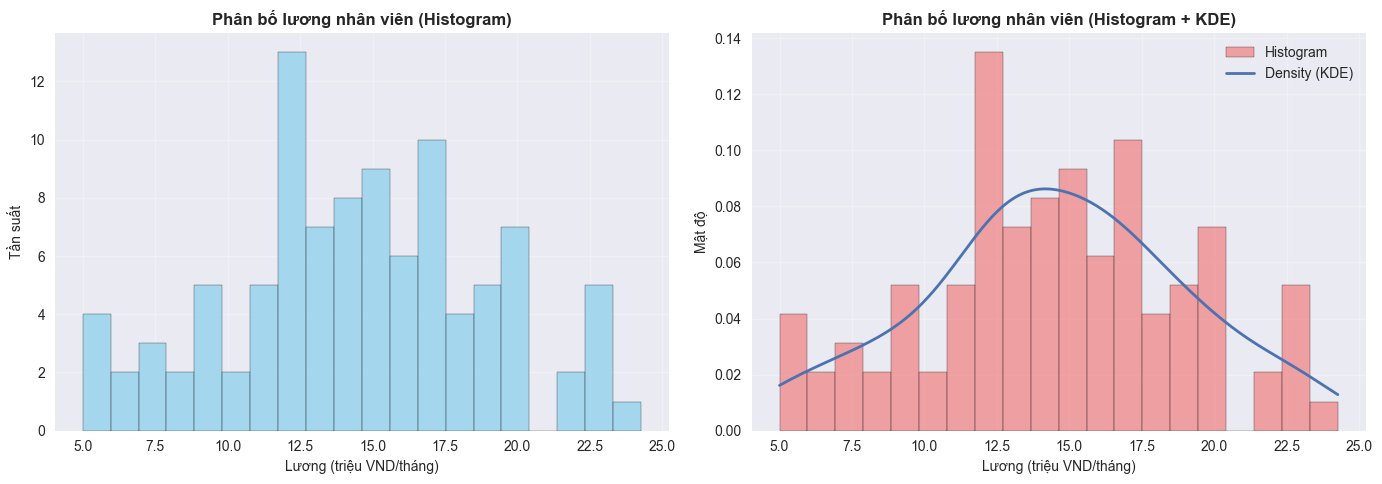


📈 Thống kê mô tả:
Trung bình: 14.51 triệu VND
Trung vị: 14.37 triệu VND
Độ lệch chuẩn: 4.44 triệu VND
Min: 5.00 triệu VND
Max: 24.26 triệu VND

✅ Hoàn thành!


In [5]:
# 📊 ĐÁP ÁN BÀI TẬP 2.1: Histogram và Density Plot

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1. Tạo dữ liệu mẫu về lương nhân viên
print("💰 Tạo dữ liệu lương nhân viên...")

# Tạo dữ liệu lương (triệu VND/tháng) cho 100 nhân viên
np.random.seed(42)
salary = np.random.normal(loc=15, scale=5, size=100)  # loc=trung bình, scale=độ lệch chuẩn
salary = np.clip(salary, 5, 30)  # Giới hạn trong khoảng 5-30 triệu

print(f"Số lượng nhân viên: {len(salary)}")
print(f"Lương trung bình: {np.mean(salary):.2f} triệu VND")

# 2. Vẽ histogram
print("\n📊 Vẽ histogram...")

# Tạo figure với 2 subplot (histogram và density plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Vẽ histogram trên subplot đầu tiên
ax1.hist(salary, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Phân bố lương nhân viên (Histogram)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Lương (triệu VND/tháng)', fontsize=10)
ax1.set_ylabel('Tần suất', fontsize=10)
ax1.grid(True, alpha=0.3)

# Vẽ histogram với density plot overlay trên subplot thứ hai
ax2.hist(salary, bins=20, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Histogram')

# Thêm density plot (KDE) - sử dụng scipy.stats.gaussian_kde
density = stats.gaussian_kde(salary)
x_range = np.linspace(salary.min(), salary.max(), 200)
ax2.plot(x_range, density(x_range), 'b-', linewidth=2, label='Density (KDE)')
ax2.set_title('Phân bố lương nhân viên (Histogram + KDE)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Lương (triệu VND/tháng)', fontsize=10)
ax2.set_ylabel('Mật độ', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In thống kê mô tả
print(f"\n📈 Thống kê mô tả:")
print(f"Trung bình: {np.mean(salary):.2f} triệu VND")
print(f"Trung vị: {np.median(salary):.2f} triệu VND")
print(f"Độ lệch chuẩn: {np.std(salary):.2f} triệu VND")
print(f"Min: {np.min(salary):.2f} triệu VND")
print(f"Max: {np.max(salary):.2f} triệu VND")

print("\n✅ Hoàn thành!")


## Bài 2.2 - Boxplot So sánh - ĐÁP ÁN


📊 Tạo dữ liệu doanh số theo khu vực...

📦 Vẽ boxplot...


/var/folders/8x/cphm0p8j0h16x_zm6w8f2nww0000gn/T/ipykernel_8122/338441163.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=labels, patch_artist=True,


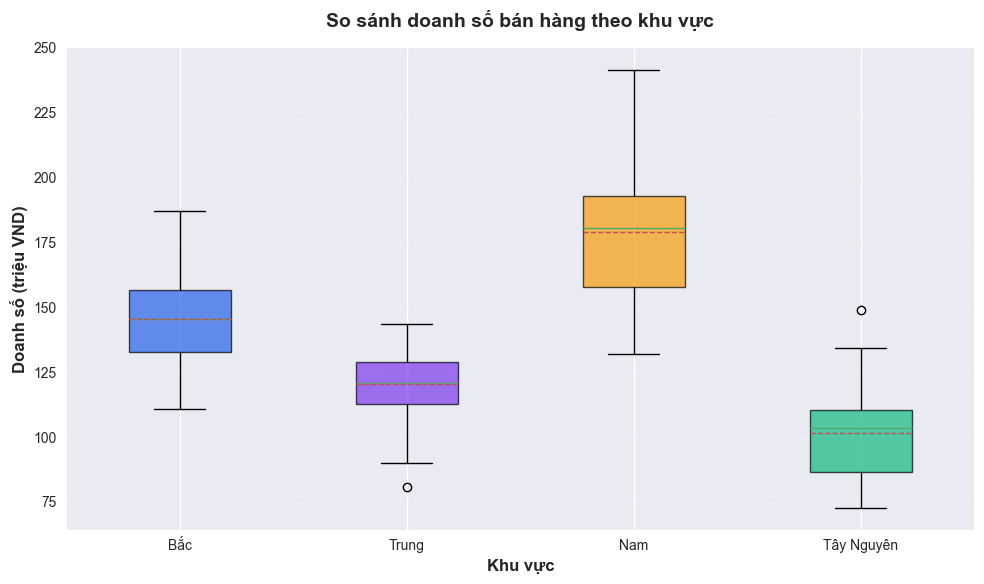


📈 Thống kê doanh số theo khu vực:
Bắc: Trung bình = 145.49, Trung vị = 145.32, Q1 = 132.78, Q3 = 156.73
Trung: Trung bình = 120.27, Trung vị = 120.69, Q1 = 112.56, Q3 = 128.81
Nam: Trung bình = 179.02, Trung vị = 180.42, Q1 = 157.93, Q3 = 192.75
Tây Nguyên: Trung bình = 101.51, Trung vị = 103.49, Q1 = 86.61, Q3 = 110.62

💡 Nhận xét: Khu vực Nam có doanh số cao nhất, tiếp theo là Bắc, Trung và Tây Nguyên.

✅ Hoàn thành!


In [6]:
# 📊 ĐÁP ÁN BÀI TẬP 2.2: Boxplot So sánh

import matplotlib.pyplot as plt
import numpy as np

# 1. Tạo dữ liệu doanh số cho 4 khu vực
print("📊 Tạo dữ liệu doanh số theo khu vực...")

# Tạo dữ liệu cho mỗi khu vực (mỗi khu vực 50 điểm dữ liệu)
np.random.seed(42)
bac = np.random.normal(loc=150, scale=20, size=50)  # Khu vực Bắc
trung = np.random.normal(loc=120, scale=15, size=50)  # Khu vực Trung
nam = np.random.normal(loc=180, scale=25, size=50)  # Khu vực Nam
tay_nguyen = np.random.normal(loc=100, scale=18, size=50)  # Tây Nguyên

# Tổ chức dữ liệu thành list để vẽ boxplot
data = [bac, trung, nam, tay_nguyen]
labels = ['Bắc', 'Trung', 'Nam', 'Tây Nguyên']

# 2. Vẽ boxplot
print("\n📦 Vẽ boxplot...")

# Tạo figure
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ boxplot
bp = ax.boxplot(data, labels=labels, patch_artist=True, 
                 showmeans=True, meanline=True)

# Tùy chỉnh màu sắc cho từng box
colors = ['#2563eb', '#7c3aed', '#f59e0b', '#10b981']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Thêm tiêu đề và nhãn
ax.set_title('So sánh doanh số bán hàng theo khu vực', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Khu vực', fontsize=12, fontweight='bold')
ax.set_ylabel('Doanh số (triệu VND)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In thống kê cho mỗi khu vực
print("\n📈 Thống kê doanh số theo khu vực:")
for i, label in enumerate(labels):
    print(f"{label}: Trung bình = {np.mean(data[i]):.2f}, Trung vị = {np.median(data[i]):.2f}, "
          f"Q1 = {np.percentile(data[i], 25):.2f}, Q3 = {np.percentile(data[i], 75):.2f}")

print("\n💡 Nhận xét: Khu vực Nam có doanh số cao nhất, tiếp theo là Bắc, Trung và Tây Nguyên.")

print("\n✅ Hoàn thành!")


# 🎨 Phần 3: Seaborn nâng cao

## Bài 3.1 - Seaborn Histogram với KDE - ĐÁP ÁN


📊 Tạo dữ liệu điểm số...
Số lượng học sinh: 200
Điểm trung bình: 6.93

📊 Vẽ histogram với seaborn...


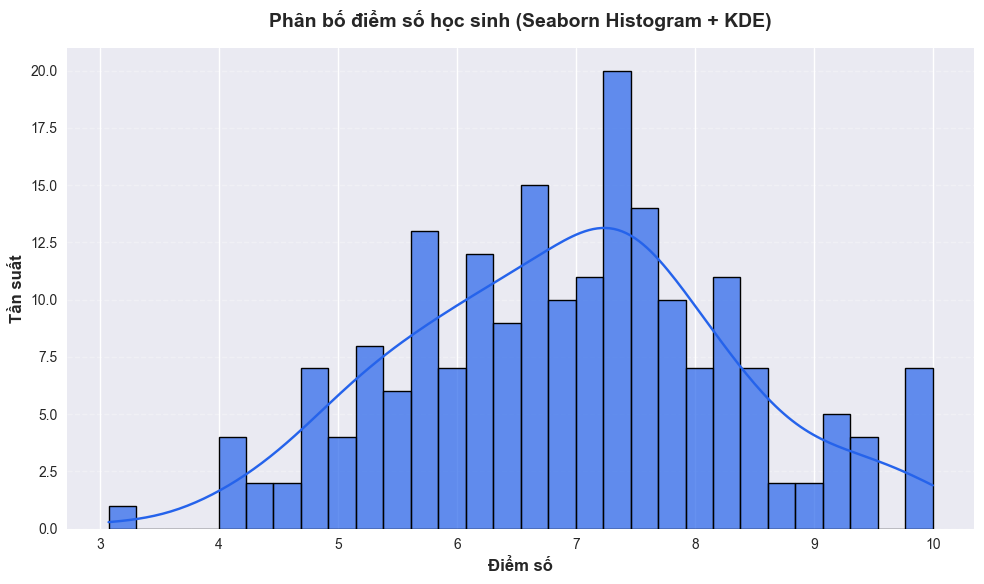


💡 Lưu ý: Seaborn tự động tạo KDE (Kernel Density Estimation) để làm mượt phân bố.
KDE giúp nhìn thấy hình dạng tổng thể của phân bố tốt hơn so với histogram đơn thuần.

✅ Hoàn thành!


In [7]:
# 📊 ĐÁP ÁN BÀI TẬP 3.1: Seaborn Histogram với KDE

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Tạo dữ liệu điểm số học sinh
print("📊 Tạo dữ liệu điểm số...")

# Tạo dữ liệu điểm số (thang điểm 0-10)
np.random.seed(42)
scores = np.random.normal(loc=7, scale=1.5, size=200)
scores = np.clip(scores, 0, 10)  # Giới hạn trong khoảng 0-10

# Tạo DataFrame (seaborn làm việc tốt với DataFrame)
df_scores = pd.DataFrame({'Diem': scores})

print(f"Số lượng học sinh: {len(df_scores)}")
print(f"Điểm trung bình: {df_scores['Diem'].mean():.2f}")

# 2. Vẽ histogram với seaborn
print("\n📊 Vẽ histogram với seaborn...")

# Tạo figure
fig, ax = plt.subplots(figsize=(10, 6))

# Sử dụng sns.histplot() với kde=True
sns.histplot(data=df_scores, x='Diem', bins=30, kde=True, 
              color='#2563eb', alpha=0.7, edgecolor='black', linewidth=1)

# Thêm tiêu đề và nhãn
ax.set_title('Phân bố điểm số học sinh (Seaborn Histogram + KDE)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_ylabel('Tần suất', fontsize=12, fontweight='bold')

# Thêm grid
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

print("\n💡 Lưu ý: Seaborn tự động tạo KDE (Kernel Density Estimation) để làm mượt phân bố.")
print("KDE giúp nhìn thấy hình dạng tổng thể của phân bố tốt hơn so với histogram đơn thuần.")

print("\n✅ Hoàn thành!")


## Bài 3.2 - Scatter Plot với Đường Hồi quy - ĐÁP ÁN


📊 Tạo dữ liệu học tập...
Số lượng học sinh: 100

📊 Vẽ scatter plot với regression line...


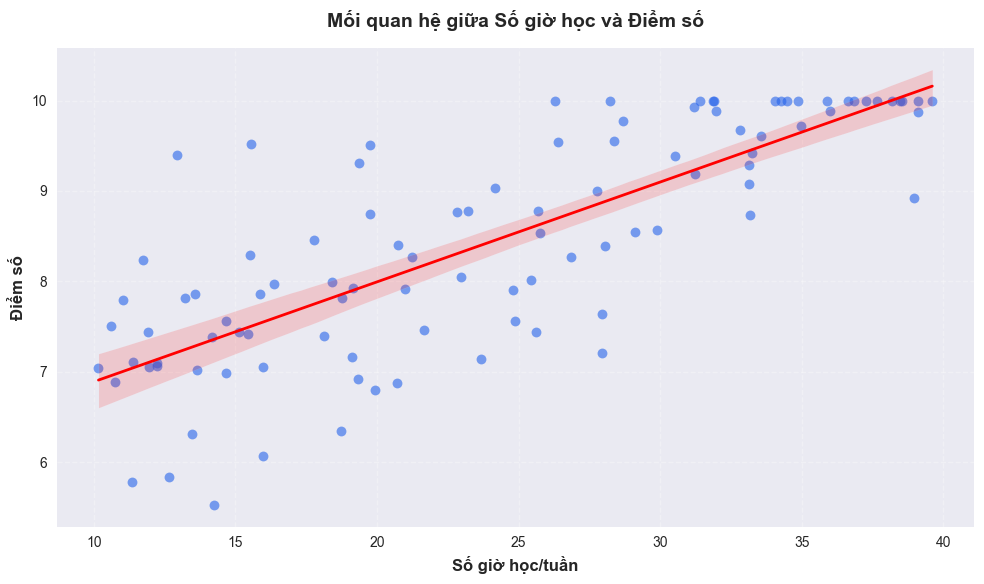


📈 Hệ số tương quan Pearson: 0.792
P-value: 0.0000
💡 Mối tương quan mạnh: Số giờ học có ảnh hưởng tích cực đến điểm số!

✅ Hoàn thành!


In [8]:
# 📊 ĐÁP ÁN BÀI TẬP 3.2: Scatter Plot với Đường Hồi quy

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# 1. Tạo dữ liệu về số giờ học và điểm số
print("📊 Tạo dữ liệu học tập...")

# Tạo dữ liệu số giờ học (từ 10 đến 40 giờ/tuần)
np.random.seed(42)
study_hours = np.random.uniform(10, 40, 100)

# Tạo điểm số có tương quan với số giờ học (có thêm noise)
scores = 5 + 0.15 * study_hours + np.random.normal(0, 1, 100)
scores = np.clip(scores, 0, 10)  # Giới hạn trong khoảng 0-10

# Tạo DataFrame
df_study = pd.DataFrame({
    'GioHoc': study_hours,
    'Diem': scores
})

print(f"Số lượng học sinh: {len(df_study)}")

# 2. Vẽ scatter plot với đường hồi quy
print("\n📊 Vẽ scatter plot với regression line...")

# Tạo figure
fig, ax = plt.subplots(figsize=(10, 6))

# Sử dụng sns.regplot() để vẽ scatter plot + regression line
sns.regplot(data=df_study, x='GioHoc', y='Diem', 
            scatter_kws={'alpha': 0.6, 's': 50, 'color': '#2563eb'}, 
            line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})

# Thêm tiêu đề và nhãn
ax.set_title('Mối quan hệ giữa Số giờ học và Điểm số', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Số giờ học/tuần', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')

# Thêm grid
ax.grid(True, alpha=0.3, linestyle='--')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Tính hệ số tương quan Pearson
correlation, p_value = pearsonr(df_study['GioHoc'], df_study['Diem'])
print(f"\n📈 Hệ số tương quan Pearson: {correlation:.3f}")
print(f"P-value: {p_value:.4f}")

if correlation > 0.7:
    print("💡 Mối tương quan mạnh: Số giờ học có ảnh hưởng tích cực đến điểm số!")
elif correlation > 0.3:
    print("💡 Mối tương quan trung bình: Có mối liên hệ tích cực giữa số giờ học và điểm số.")
else:
    print("💡 Mối tương quan yếu: Mối liên hệ không rõ ràng.")

print("\n✅ Hoàn thành!")


# 🐼 Phần 4: Pandas Plotting

## Bài 4.1 - Trực quan hóa nhanh với Pandas - ĐÁP ÁN


📊 Tạo DataFrame doanh thu...
DataFrame doanh thu:
            SanPham_A  SanPham_B  SanPham_C
2024-01-31        151        103        152
2024-02-29        343        185        347
2024-03-31        457        286        524
2024-04-30        628        418        665
2024-05-31        788        499        873

📊 Vẽ biểu đồ với pandas...


/var/folders/8x/cphm0p8j0h16x_zm6w8f2nww0000gn/T/ipykernel_8122/544322518.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2024-01-01', periods=12, freq='M')


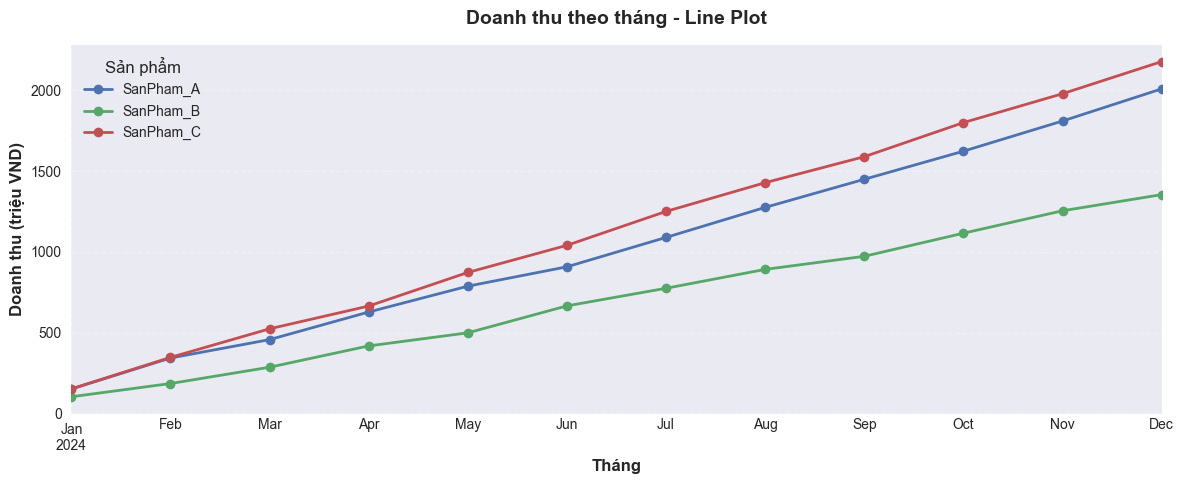

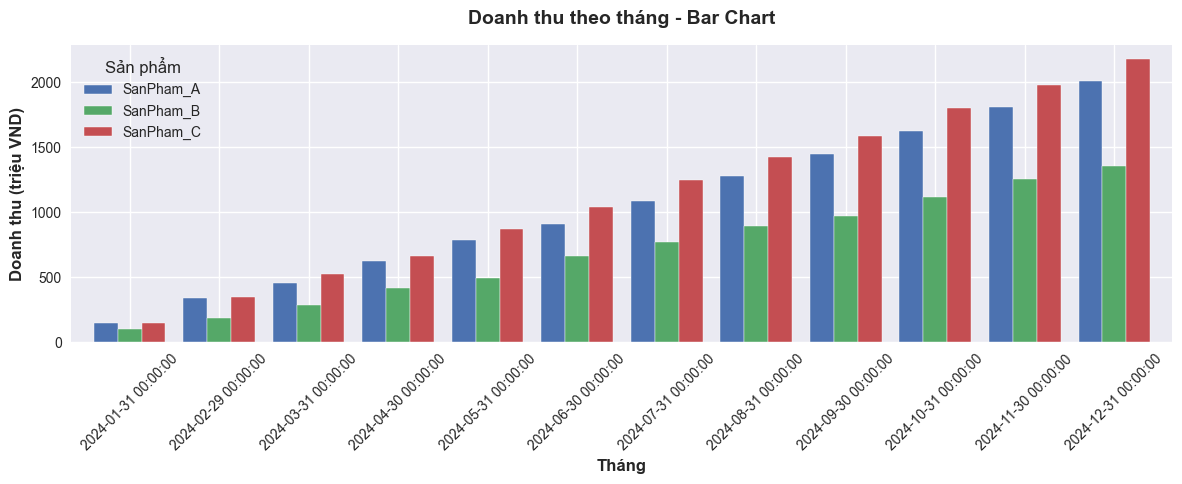

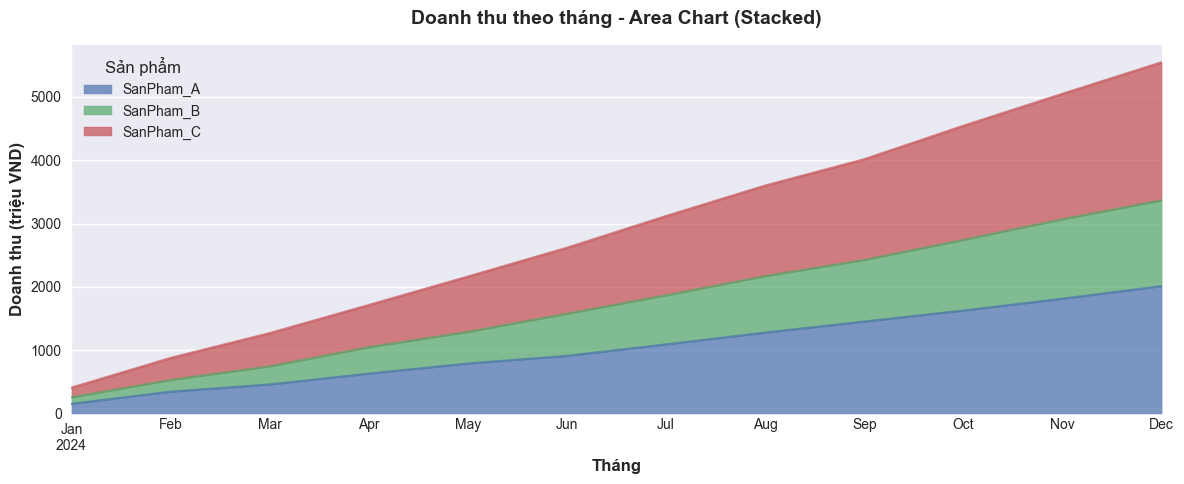


💡 Lưu ý: Pandas .plot() rất tiện lợi cho việc trực quan hóa nhanh từ DataFrame.
Tuy nhiên, để tùy chỉnh sâu hơn, bạn có thể sử dụng matplotlib trực tiếp.

✅ Hoàn thành!


In [9]:
# 📊 ĐÁP ÁN BÀI TẬP 4.1: Trực quan hóa nhanh với Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo DataFrame với dữ liệu doanh thu
print("📊 Tạo DataFrame doanh thu...")

# Tạo dữ liệu tháng
months = pd.date_range('2024-01-01', periods=12, freq='M')

# Tạo dữ liệu doanh thu cho 3 sản phẩm
np.random.seed(42)
data = {
    'SanPham_A': np.random.randint(100, 200, 12).cumsum(),
    'SanPham_B': np.random.randint(80, 180, 12).cumsum(),
    'SanPham_C': np.random.randint(120, 220, 12).cumsum()
}

# Tạo DataFrame với index là tháng
df_revenue = pd.DataFrame(data, index=months)

print("DataFrame doanh thu:")
print(df_revenue.head())

# 2. Vẽ biểu đồ với pandas
print("\n📊 Vẽ biểu đồ với pandas...")

# Vẽ line plot
ax1 = df_revenue.plot(kind='line', figsize=(12, 5), marker='o', linewidth=2)
ax1.set_title('Doanh thu theo tháng - Line Plot', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax1.set_ylabel('Doanh thu (triệu VND)', fontsize=12, fontweight='bold')
ax1.legend(title='Sản phẩm', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Vẽ bar chart
ax2 = df_revenue.plot(kind='bar', figsize=(12, 5), width=0.8)
ax2.set_title('Doanh thu theo tháng - Bar Chart', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax2.set_ylabel('Doanh thu (triệu VND)', fontsize=12, fontweight='bold')
ax2.legend(title='Sản phẩm', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Vẽ area chart (stacked)
ax3 = df_revenue.plot(kind='area', figsize=(12, 5), alpha=0.7)
ax3.set_title('Doanh thu theo tháng - Area Chart (Stacked)', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax3.set_ylabel('Doanh thu (triệu VND)', fontsize=12, fontweight='bold')
ax3.legend(title='Sản phẩm', fontsize=10)
plt.tight_layout()
plt.show()

print("\n💡 Lưu ý: Pandas .plot() rất tiện lợi cho việc trực quan hóa nhanh từ DataFrame.")
print("Tuy nhiên, để tùy chỉnh sâu hơn, bạn có thể sử dụng matplotlib trực tiếp.")

print("\n✅ Hoàn thành!")


# ✨ Phần 5: Nguyên tắc thiết kế

## Bài 5.1 - Heatmap (Bản đồ nhiệt) - ĐÁP ÁN


📊 Sử dụng dữ liệu khách hàng...
Số lượng khách hàng: 150
   Tuoi   ThuNhap   ChiTieu GioiTinh ThanhPho
0    44  11000000  12000000       Nữ   Hà Nội
1    48  44000000   6000000      Nam  Đà Nẵng
2    23  43000000  28000000      Nam  Cần Thơ
3    44  39000000  17000000       Nữ   Hà Nội
4    57  22000000   7000000      Nam  Cần Thơ

📊 Tính ma trận tương quan...

Ma trận tương quan:
             Tuoi   ThuNhap   ChiTieu
Tuoi     1.000000  0.038605  0.003263
ThuNhap  0.038605  1.000000  0.064301
ChiTieu  0.003263  0.064301  1.000000

🔥 Vẽ heatmap...


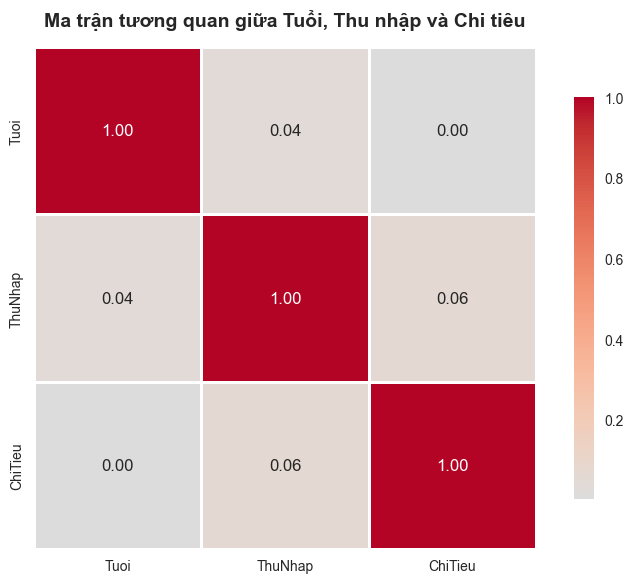


💡 Nhận xét về mối tương quan:
Hãy quan sát các giá trị trong heatmap để nhận xét về mối quan hệ giữa các biến.
Giá trị gần 1: tương quan dương mạnh
Giá trị gần -1: tương quan âm mạnh
Giá trị gần 0: không có tương quan

✅ Hoàn thành!


In [10]:
# 📊 ĐÁP ÁN BÀI TẬP 5.1: Heatmap (Bản đồ nhiệt)
# Sử dụng dữ liệu đã tạo sẵn (customer_data) từ cell "Tạo dữ liệu ban đầu"

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Sử dụng dữ liệu đã tạo sẵn
print("📊 Sử dụng dữ liệu khách hàng...")
print(f"Số lượng khách hàng: {len(customer_data)}")
print(customer_data.head())

# 2. Tính ma trận tương quan
print("\n📊 Tính ma trận tương quan...")

# Chọn các cột số từ customer_data (Tuoi, ThuNhap, ChiTieu)
numeric_cols = customer_data[['Tuoi', 'ThuNhap', 'ChiTieu']]

# Tính ma trận tương quan
correlation_matrix = numeric_cols.corr()
print("\nMa trận tương quan:")
print(correlation_matrix)

# 3. Vẽ heatmap
print("\n🔥 Vẽ heatmap...")

# Tạo figure
fig, ax = plt.subplots(figsize=(8, 6))

# Sử dụng sns.heatmap() để vẽ ma trận tương quan
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)

# Thêm tiêu đề
ax.set_title('Ma trận tương quan giữa Tuổi, Thu nhập và Chi tiêu', 
             fontsize=14, fontweight='bold', pad=15)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In nhận xét về mối tương quan
print("\n💡 Nhận xét về mối tương quan:")
print("Hãy quan sát các giá trị trong heatmap để nhận xét về mối quan hệ giữa các biến.")
print("Giá trị gần 1: tương quan dương mạnh")
print("Giá trị gần -1: tương quan âm mạnh")
print("Giá trị gần 0: không có tương quan")

print("\n✅ Hoàn thành!")
